In [43]:
from autograd.tensor import Tensor as tn
from autograd.dropout import *
from autograd.parameter import Parameter as pr
from autograd.flatten import Flatten as fl
from autograd.module import Module
from autograd.nn import Sequential
from autograd.linear import Linear
from autograd.act import Relu, Sigmoid 
from autograd.loss import CEL
from autograd.optim import Adam
from autograd.mini_batch import random_mini_batches as rmb
from autograd.grad_check import Grad_Check as gc
from functools import reduce

import sys 
import matplotlib.pyplot as plt
import numpy as np

In [44]:
from Dataset1 import catnoncat

In [45]:
train_x = catnoncat.train_x() 
test_x = catnoncat.test_img() 

In [46]:
train_x = fl().forward(train_x)
test_x = fl().forward(test_x)

data shape: (12288, 209)
data shape: (12288, 50)


In [47]:
train_y = tn(catnoncat.train_y())
test_y = tn(catnoncat.test_y())

In [48]:
print(train_x.shape,' ',test_x.shape)

(12288, 209)   (12288, 50)


In [96]:
mod2 = Sequential([
         Linear(50,12288),
            Relu(),
        #Dropout(.9),
         Linear(20,50),
            Relu(),
        #Dropout(.9),
         Linear(10,20),
            Relu(),
        #Dropout(.9),
         Linear(1,10),
            Sigmoid()])

Cost after epoch 0: 0.838214
Cost after epoch 32: 0.548493
Cost after epoch 64: 0.568051
Cost after epoch 96: 0.438714
Cost after epoch 128: 0.407151
Cost after epoch 160: 0.428967
Cost after epoch 192: 0.383868
Cost after epoch 224: 0.364927
Cost after epoch 256: 0.286709
Cost after epoch 288: 0.316376
Cost after epoch 320: 0.289317
Cost after epoch 352: 0.130119
Cost after epoch 384: 0.284269
Cost after epoch 416: 0.203265
Cost after epoch 448: 0.081195
Cost after epoch 480: 0.157277
Cost after epoch 512: 0.093868
Cost after epoch 544: 0.084272
Cost after epoch 576: 0.092164
Cost after epoch 608: 0.095099
Cost after epoch 640: 0.102701
Cost after epoch 672: 0.088785
Cost after epoch 704: 0.055068
Cost after epoch 736: 0.044834
Cost after epoch 768: 0.049983
Cost after epoch 800: 0.052076
Cost after epoch 832: 0.034167
Cost after epoch 864: 0.024840
Cost after epoch 896: 0.008929
Cost after epoch 928: 0.022196
Cost after epoch 960: 0.018635
Cost after epoch 992: 0.011593
Cost after ep

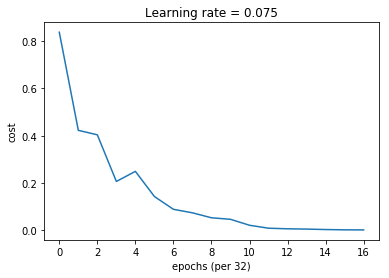

In [97]:
optimizer = Adam(lr=.0000075, beta1 = 0.99, beta2 = .990,  epsilon = 1e-8)
costs = []
iteration = 1625
seed = 10
for i in range(iteration):
    seed = seed + i
    minibatches = rmb(train_x.data, train_y.data, 64, seed)

    for minibatch in minibatches:

        (minibatch_X, minibatch_Y) = minibatch
        minibatch_X, minibatch_Y=tn(minibatch_X),tn(minibatch_Y)
        out = mod2.forward(minibatch_X)
        cout = CEL(out,minibatch_Y)
        loss = cout.sum()
        epoch_loss = loss.data

        loss.backward()
        
        #optimizer.save_params(mod2)
        t = t+1
        optimizer.step(mod2,t)


    # Print the cost every 1000 epoch
    if  i % 32 == 0:
        print("Cost after epoch %i: %f" % (i, epoch_loss))
    if i % 100 == 0:
        costs.append(epoch_loss)


# plot the cost
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('epochs (per 32)')
plt.title("Learning rate = " + str(.075))
plt.show()

mod2.predict(test_x,test_y)

In [98]:
mod2.predict(test_x,test_y)

Accuracy: 0.78


In [19]:
lrs=[]

In [21]:
lrs.append((it,optimizer.lr))